In [ ]:
!pip install idx2numpy
import keras
import numpy as np
import pandas as pd
from keras import layers, optimizers, losses, metrics
import idx2numpy
import matplotlib.pyplot as plt

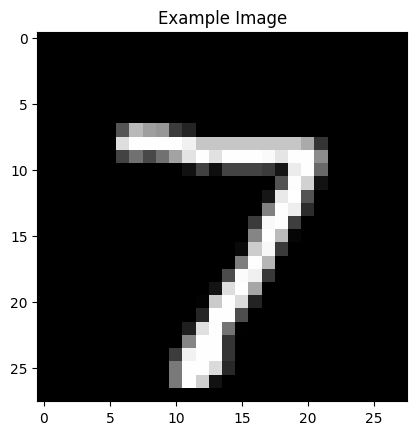

In [ ]:
# Load MNIST dataset
data_path = '/content/t10k-images.idx3-ubyte'
labels_path = '/content/t10k-labels.idx1-ubyte'


# Extract images
images = idx2numpy.convert_from_file(data_path)
labels = idx2numpy.convert_from_file(labels_path)

# Reshape the flattened image to its original dimensions (28, 28)
reshaped_image = np.reshape(images[0], (28, 28))

# Display the reshaped image
plt.imshow(reshaped_image, cmap='gray')
plt.title("Example Image")
plt.show()


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses, metrics
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input

# Assuming 'images' is your MNIST dataset loaded earlier

# Preprocess MNIST data for autoencoder (assuming images are normalized)
images_autoencoder = images.reshape((images.shape[0], 28, 28, 1))  # Reshape for Conv2D
images_autoencoder = images_autoencoder.astype('float32') / 255.0  # Normalize pixel values

# Define the input layer for autoencoder
input_img = Input(shape=(28, 28, 1))

# Autoencoder layers
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)

# Decoder layers
conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
up1 = UpSampling2D((2, 2))(conv4)
conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv5)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)

# Combine encoder and decoder
autoencoder_model = keras.Model(input_img, decoded)

# Compile the autoencoder model
autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder_model.fit(images_autoencoder, images_autoencoder, epochs=10, batch_size=32, shuffle=True, validation_split=0.2)

# Encoder part (portion of the autoencoder model)
encoder_model = keras.Model(input_img, conv3)


Epoch 1/10
250/250 [==============================] - 58s 227ms/step - loss: 0.1186 - val_loss: 0.0785
Epoch 2/10
250/250 [==============================] - 57s 228ms/step - loss: 0.0734 - val_loss: 0.0733
Epoch 3/10
250/250 [==============================] - 57s 229ms/step - loss: 0.0701 - val_loss: 0.0714
Epoch 4/10
250/250 [==============================] - 57s 229ms/step - loss: 0.0685 - val_loss: 0.0722
Epoch 5/10
250/250 [==============================] - 57s 229ms/step - loss: 0.0676 - val_loss: 0.0695
Epoch 6/10
250/250 [==============================] - 58s 231ms/step - loss: 0.0668 - val_loss: 0.0688
Epoch 7/10
250/250 [==============================] - 57s 229ms/step - loss: 0.0663 - val_loss: 0.0682
Epoch 8/10
250/250 [==============================] - 57s 229ms/step - loss: 0.0660 - val_loss: 0.0679
Epoch 9/10
250/250 [==============================] - 58s 230ms/step - loss: 0.0656 - val_loss: 0.0680
Epoch 10/10
204/250 [=======================>......] - ETA: 10s - loss: 0

KeyboardInterrupt: ignored

In [ ]:


#images = idx2numpy.convert_from_file(file_path_images)
#labels = idx2numpy.convert_from_file(file_path_labels)

# Normalize pixel values to be between 0 and 1
images = images.astype('float32') / 255.0

# Flatten the images
images = images.reshape((images.shape[0], -1))

# Convert labels to one-hot encoding
labels_one_hot = keras.utils.to_categorical(labels, 10)

# Initializes the model
model = keras.Sequential()

# Adds a densely-connected layer with 64 nodes to the model:
# input shape defines the number of input features (dimensions)
# activation defines the activation function of each layer
model.add(layers.Dense(64, activation='relu', input_shape=(784,)))  # Assuming flattened MNIST images

# Add another dense layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 nodes (for digits 0 through 9) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.01),
              loss=losses.CategoricalCrossentropy(),
              metrics=[metrics.CategoricalAccuracy()])

# Train the model (you may need to adjust the number of epochs and batch_size)
model.fit(images, labels_one_hot, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 0.4455 - categorical_accuracy: 0.8641 - val_loss: 0.2491 - val_categorical_accuracy: 0.9240
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2180 - categorical_accuracy: 0.9330 - val_loss: 0.1668 - val_categorical_accuracy: 0.9480
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.1772 - categorical_accuracy: 0.9467 - val_loss: 0.3309 - val_categorical_accuracy: 0.9055
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 0.1551 - categorical_accuracy: 0.9517 - val_loss: 0.2625 - val_categorical_accuracy: 0.9315
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: 0.1401 - categorical_accuracy: 0.9576 - val_loss: 0.2800 - val_categorical_accuracy: 0.9395
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.1243 - categorical_accuracy: 0.9629 - val_loss: 0.2493 - val_categorical_accuracy: 0.9395
Epoc